In [1]:
# Dependencies and setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

# Read in the mouse data and the clinical trial data
clinical_data = pd.read_csv("Resources/clinical_trial_data.csv")
mouse_data = pd.read_csv("Resources/mouse_drug_data.csv")

# Combine the two datasets into one using a left join
merged_df = pd.merge(clinical_data, mouse_data, on="Mouse ID", how="left")
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the mean tumor volume data grouped by "Drug" and "Timepoint"
tumor = merged_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert it into a DataFrame
tumor_data = pd.DataFrame(data=tumor)
tumor_data

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562
...                                 ...
Ramicane  0                   45.000000
          5                   43.944859
          10                  42.531957
          15                  41.495061
          20                  40.238325
          25                  38.974300
          30                  38.703137
          35                  37.451996
          40                  36.574081
          45                  34.955595
Stelasyn  0                   45.000000
          5                   47.527452
          10                  49.463844
          15                  51.529409
          20                  54.067395
          25                  56.166123
          30                  59.826738
          35                  62.440699
          40                  65.356386
          45                  68.438310
Zoniferol 0                   45.000000
          5                   46.851818
          10                  48.689881
          15                  50.779059
          20                  53.170334
          25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [3]:
# Store the standard error of tumor volumes grouped by "Drug" and "Timepoint"
tumor_std_error = merged_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert it into a DataFrame
tumor_std_error = pd.DataFrame(data=tumor_std_error)
tumor_std_error.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Re-Format the mean tumor volume DataFrame into a pivot table
tumor_volume = pd.pivot_table(merged_df, index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


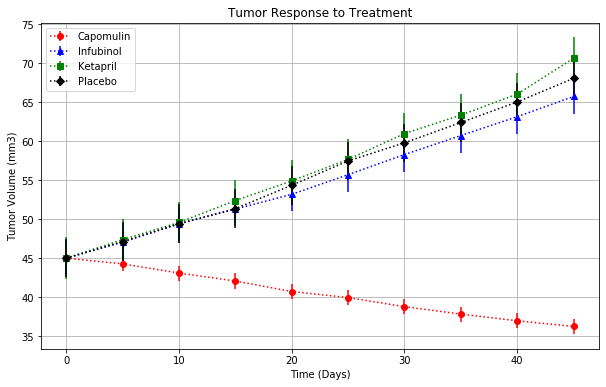

In [25]:
# Create a variable to hold the "Timepoint" values for the x-axis
days = tumor_volume.index

# Create scatter plot showing how tumor volume changes with the four treatments over time (with error bars)
plt.figure(figsize=(10, 6))
plt.errorbar(days, tumor_volume["Capomulin"], yerr=tumor_volume["Capomulin"].sem(), fmt="ro", linestyle=":", label="Capomulin")
plt.errorbar(days, tumor_volume["Infubinol"], yerr=tumor_volume["Infubinol"].sem(), fmt="b^", linestyle=":", label="Infubinol")
plt.errorbar(days, tumor_volume["Ketapril"], yerr=tumor_volume["Ketapril"].sem(), fmt="gs", linestyle=":", label="Ketapril")
plt.errorbar(days, tumor_volume["Placebo"], yerr=tumor_volume["Placebo"].sem(), fmt="kD", linestyle=":", label="Placebo")

# Add a title, axes labels, a legend, and gridlines
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.legend(loc="upper left")
plt.grid()

# Save the figure
plt.savefig("Unit-5/Images/tumor_response.png")
             

In [6]:
# Store the mean metastatic sites data grouped by "Drug" and "Timepoint"
meta_sites = merged_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert the dataset to a DataFrame
metastatic_data = pd.DataFrame(data=meta_sites)
metastatic_data

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111
...                               ...
Ramicane  0                  0.000000
          5                  0.120000
          10                 0.250000
          15                 0.333333
          20                 0.347826
          25                 0.652174
          30                 0.782609
          35                 0.952381
          40                 1.100000
          45                 1.250000
Stelasyn  0                  0.000000
          5                  0.240000
          10                 0.478261
          15                 0.782609
          20                 0.952381
          25                 1.157895
          30                 1.388889
          35                 1.562500
          40                 1.583333
          45                 1.727273
Zoniferol 0                  0.000000
          5                  0.166667
          10                 0.500000
          15                 0.809524
          20                 1.294118
          25                 1.687500
          30                 1.933333
          35                 2.285714
          40                 2.785714
          45                 3.071429

[100 rows x 1 columns]

In [7]:
# Store the standard error of metastatic sites grouped by "Drug" and "Timepoint"
meta_std_error = merged_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]

# Convert to a DataFrame
meta_std_error = pd.DataFrame(data=meta_std_error)
meta_std_error

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320
...                               ...
Ramicane  0                  0.000000
          5                  0.066332
          10                 0.090289
          15                 0.115261
          20                 0.119430
          25                 0.119430
          30                 0.139968
          35                 0.145997
          40                 0.160591
          45                 0.190221
Stelasyn  0                  0.000000
          5                  0.087178
          10                 0.123672
          15                 0.153439
          20                 0.200905
          25                 0.219824
          30                 0.230641
          35                 0.240983
          40                 0.312815
          45                 0.359062
Zoniferol 0                  0.000000
          5                  0.077709
          10                 0.109109
          15                 0.111677
          20                 0.166378
          25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [8]:
# Re-format the mean mestastatic sites DataFrame into a pivot table
meta_sites = pd.pivot_table(metastatic_data, index="Timepoint", columns="Drug", values="Metastatic Sites")
meta_sites.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


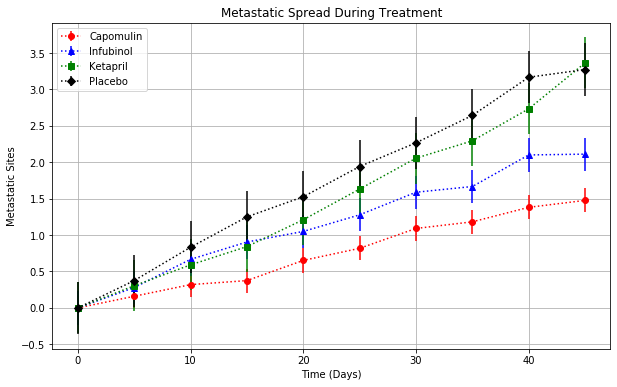

In [27]:
# Create scatter plot showing how the number of metastatic sites changes with the four treatments
# over time (with error bars)
plt.figure(figsize=(10, 6))
plt.errorbar(days, meta_sites["Capomulin"], yerr=meta_sites["Capomulin"].sem(), fmt="ro", linestyle=":", label="Capomulin")
plt.errorbar(days, meta_sites["Infubinol"], yerr=meta_sites["Infubinol"].sem(), fmt="b^", linestyle=":", label="Infubinol")
plt.errorbar(days, meta_sites["Ketapril"], yerr=meta_sites["Ketapril"].sem(), fmt="gs", linestyle=":", label="Ketapril")
plt.errorbar(days, meta_sites["Placebo"], yerr=meta_sites["Placebo"].sem(), fmt="kD", linestyle=":", label="Placebo")

# Add a title, axes labels, a legend, and gridlines
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.title("Metastatic Spread During Treatment")
plt.legend(loc="upper left")
plt.grid()

# Save the figure
plt.savefig("Unit-5/Images/metastatic_spread.png")


In [10]:
# Store the number of mice grouped by "Drug" and "Timepoint"
mice = merged_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]

# Convert to a DataFrame and rename the "Mouse ID" column
mice_data = pd.DataFrame(data=mice)
mice_data = mice_data.rename(columns={"Mouse ID": "Mouse Count"})
mice_data

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9
...                          ...
Ramicane  0                   25
          5                   25
          10                  24
          15                  24
          20                  23
          25                  23
          30                  23
          35                  21
          40                  20
          45                  20
Stelasyn  0                   26
          5                   25
          10                  23
          15                  23
          20                  21
          25                  19
          30                  18
          35                  16
          40                  12
          45                  11
Zoniferol 0                   25
          5                   24
          10                  22
          15                  21
          20                  17
          25                  16
          30                  15
          35                  14
          40                  14
          45                  14

[100 rows x 1 columns]

In [11]:
# Re-format the DataFrame into a pivot table
mice_count = pd.pivot_table(mice_data, index="Timepoint", columns="Drug", values="Mouse Count")
mice_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


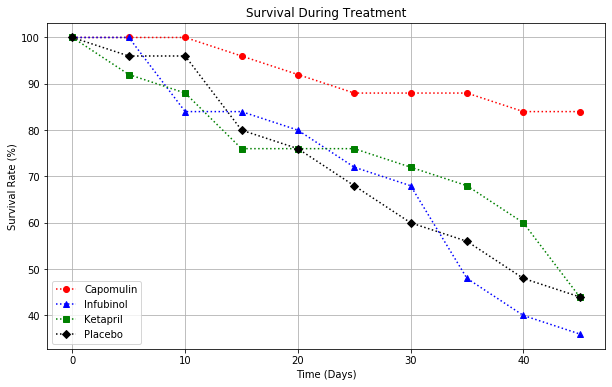

In [28]:
# Create scatter plot showing how the number of mice still alive (using percentages) changes with the four treatments 
# over time (with error bars)
plt.figure(figsize=(10, 6))
plt.errorbar(days, mice_count["Capomulin"]/25 * 100, fmt="ro", linestyle=":", label="Capomulin")
plt.errorbar(days, mice_count["Infubinol"]/25 * 100, fmt="b^", linestyle=":", label="Infubinol")
plt.errorbar(days, mice_count["Ketapril"]/25 * 100, fmt="gs", linestyle=":", label="Ketapril")
plt.errorbar(days, mice_count["Placebo"]/25 * 100, fmt="kD", linestyle=":", label="Placebo")

# Add a title, axes labels, a legend, and gridlines
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.legend(loc="lower left")
plt.grid()

# Save the figure
plt.savefig("Unit-5/Images/survival_rate.png")

In [13]:
# Calculate the % changes in tumor volume for each drug
pct_change = (tumor_volume.iloc[-1]/tumor_volume.iloc[0] - 1) * 100
pct_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

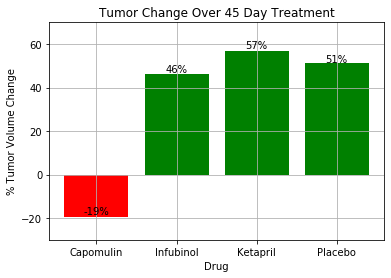

In [38]:
# Create a list for the four treatments
drug_list = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
pct_changes = [(pct_change[drug]) for drug in drug_list]
x_axis = np.arange(len(drug_list))

# Plot the data on a bar chart and label the title, axes, xticks, and add gridlines
percent_change_plot = plt.bar(x_axis, pct_changes, color=(pct_change > 0).map({True:"g", False:"r"}), align="center")
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-30, 70)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])
plt.grid()

# Add the percentage numbers onto the chart by defining a function, formatting the labels, and positioning them
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        height_format = "{0:.0f}%".format(rect.get_height())
        plt.text(rect.get_x() + rect.get_width()/2., int(height), s=height_format, color="black",
                 ha="center", va="bottom")
autolabel(percent_change_plot)

# Save the figure
plt.savefig("Unit-5/Images/tumor_change.png")